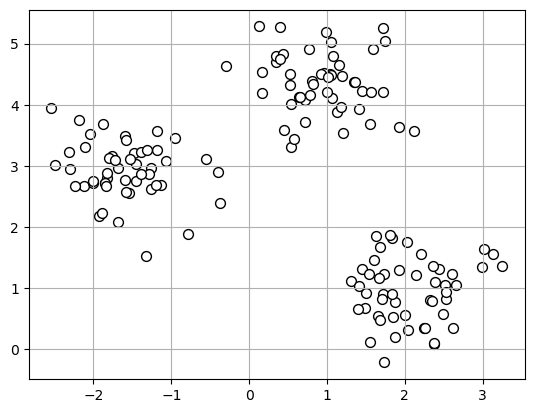

In [1]:
# evaluate unsupervised algorithm

# set up datasets
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True,
                  random_state=0)

# visualize cluster datasets
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], 
            X[:, 1], 
            c='white', 
            marker='o', 
            edgecolors='black', 
            s=50)
plt.grid()
plt.show()

c:\Users\12923\.conda\envs\env_datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12923\.conda\envs\env_datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12923\.conda\envs\env_datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12923\.conda\envs\env_datascience\lib\site-packages\sklearn\cluster\_kmea

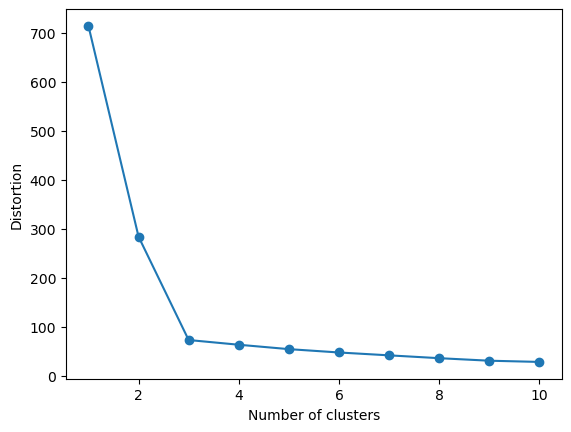

In [3]:
# elbow method for best 'cluster number'
# find the turning point of SSE
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                 init='k-means++', 
                 n_init=10, 
                 max_iter=300, 
                 random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

# visualize different cluster SSE outcome
plt.plot(range(1, 11), 
         distortions, 
         marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()    # we can see that at 3 we have the best speed of descent of SSE.

c:\Users\12923\.conda\envs\env_datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\12923\.conda\envs\env_datascience\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


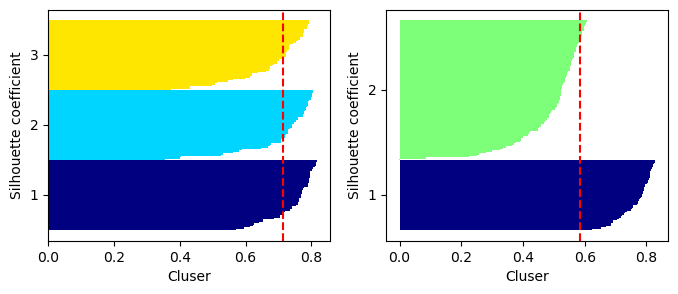

In [21]:
# silhouette analysis for inner correlation
# 1. calculate cluster cohesion: a(i)
# 2. calculate cluster separation: b(i)
# 3. compute silhouette coefficience: s(i) = b - a / max(b, a)

km_3 = KMeans(n_clusters=3, 
              init='k-means++', 
              max_iter=300, 
              n_init=10, 
              tol=0.0001, 
              random_state=0)
km_2 = KMeans(n_clusters=2, 
              init='k-means++', 
              max_iter=300, 
              n_init=10, 
              tol=0.0001, 
              random_state=0)

y_km_3 = km_3.fit_predict(X)
y_km_2 = km_2.fit_predict(X)
y_km = [y_km_3, y_km_2]

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

# calculate number of clusters and sihouette values
cluster_labels = []
n_clusters = []
silhouette_vals = []
for i in range(0, 2):
    cluster_labels.append(np.unique(y_km[i]))
    n_clusters.append(cluster_labels[i].shape[0])
    silhouette_vals.append(silhouette_samples(X, y_km[i], metric='euclidean'))
# cluster_labels = [np.unique(y_km[0]), np.unique(y_km[1])]
# n_clusters = [cluster_labels[0].shape[0], cluster_labels[1].shape[0]]
# silhouette_vals = [silhouette_samples(X, y_km[0], metric='euclidean'), silhouette_samples(X, y_km[1], metric='euclidean')]

# initialize values for visualization
y_bot, y_top = 0, 0
y_ticks = [[], []]

# visualize silhouette map
# 1. cluster for y axis, and silhouette values for x axis
# 2. get (y_top - y_bot) be the length of the bar, middle for the ticks
# 3. update y_top, y_bot in every loops(clusters)
for i in range(0, 2):
    for idx, col in enumerate(cluster_labels[i]):
        vals = silhouette_vals[i][y_km[i]==col]
        vals.sort()
        y_top += len(vals)
        color = cm.jet(float(idx) / n_clusters[i])
        ax[i].barh(range(y_bot, y_top), 
                   vals, 
                   height=1.0, 
                   edgecolor='none', 
                   color=color)
        y_ticks[i].append((y_top + y_bot) / 2)
        y_bot += len(vals)
    ax[i].set_yticks(y_ticks[i], cluster_labels[i] + 1)
    ax[i].set_xlabel('Cluser')
    ax[i].set_ylabel('Silhouette coefficient')
    avg_silhouette = np.mean(silhouette_vals[i])
    ax[i].axvline(avg_silhouette, 
            color='red', 
            linestyle='--')
plt.show()